## IMPORT PACKAGES

In [8]:
import pandas as pd
# import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import json

# from mpl_toolkits.basemap import Basemap

from pandas.io.json import json_normalize
# from wordcloud import WordCloud
# import squarify
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re 
# import gensim 
# from gensim import corpora

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.use('bmh')

## LOAD DATA FOR ALL BUSINESSES & TORONTO RESTAURANTS 

In [9]:
businesses = []
with open('yelp_academic_dataset_business.json', encoding='utf8') as f:
    for line in f:
        businesses.append(json.loads(line))
        
df = json_normalize(businesses)
df.columns = df.columns.map(lambda x: x.split(".")[-1])

df

,address,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,...,Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,...,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,NaN,NaN,none,NaN,NaN,NaN,NaN,False,NaN,...,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,...,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8:0-17:0,1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
5,"20235 N Cave Creek Rd, Ste 1115",NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,...,5:30-20:0,1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
6,631 Bloor St W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,43.664378,-79.414424,Bnc Cake House,Koreatown,M6G 1K8,7,4.0,ON
7,"3417 Derry Road E, Unit 103",NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8,1440 N. Dysart Ave,NaN,NaN,none,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,...,0:0-0:0,1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ
9,209 Oakland Ave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,...,9:0-18:0,1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA


### TOP WORDS (BY BUSINESS) IN YELP DATASET

In [10]:
business = df


### TOP CITIES FOR ALL BUSINESS IN YELP

In [11]:
len(business)

188593

Number of city listed 1111


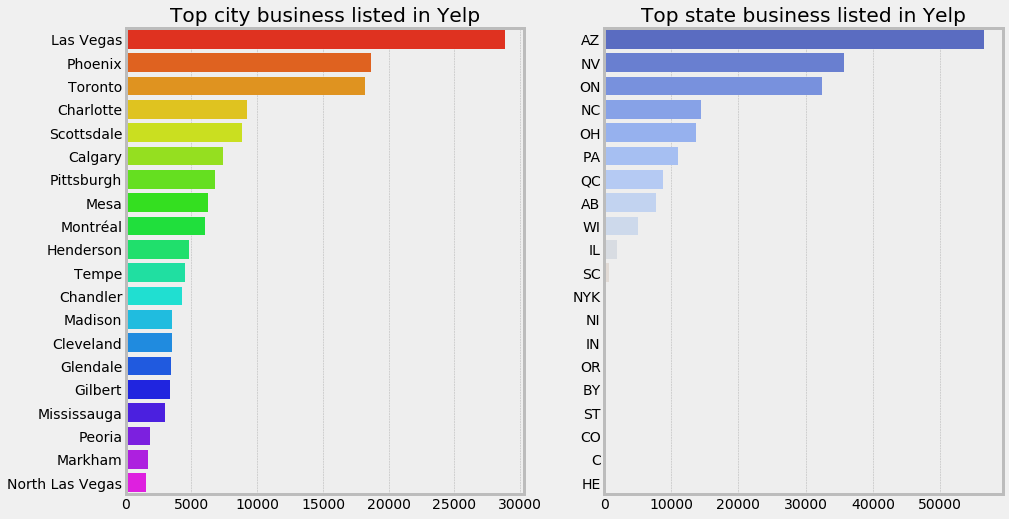

In [12]:
print('Number of city listed',business['city'].nunique())
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = business['city'].value_counts()[:20].to_frame()

sns.barplot(cnt['city'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top city business listed in Yelp')

cnt = business['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top state business listed in Yelp');

### TOP CITIES FOR RESTAURANTS IN YELP

In [13]:
len(business['city'].unique())


1111

Number of city listed 774


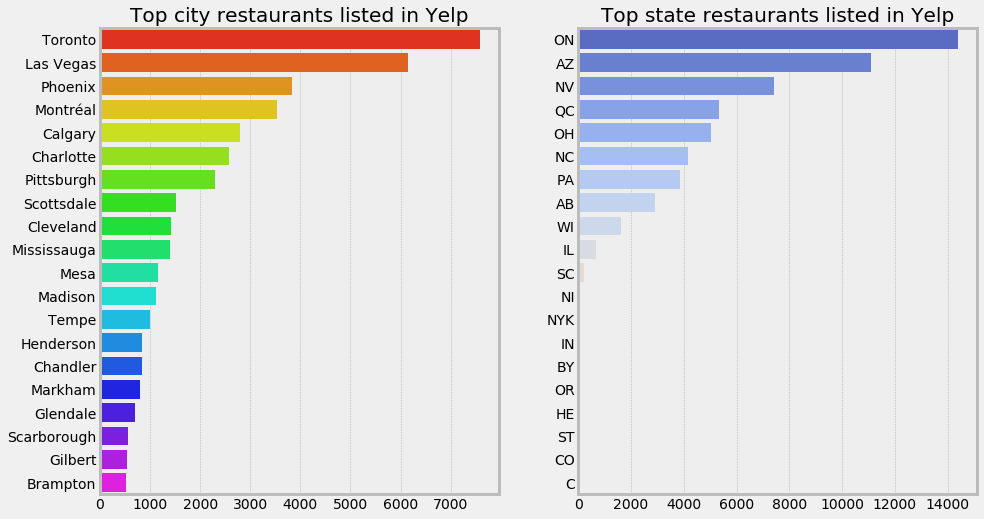

In [14]:
all_restaurants = df[df['categories'].str.contains("Restaurant") == True]

print('Number of city listed',all_restaurants['city'].nunique())
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = all_restaurants['city'].value_counts()[:20].to_frame()

sns.barplot(cnt['city'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top city restaurants listed in Yelp')

cnt = all_restaurants['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top state restaurants listed in Yelp');

In [15]:
restaurants = df[df['categories'].str.contains("Restaurant") == True]

c_restaurants = restaurants[restaurants['city'] == 'Calgary']

c_italian = c_restaurants[c_restaurants['categories'].str.contains("Italian") == True]
c_pizza = c_restaurants[c_restaurants['categories'].str.contains("Pizza") == True]
c_chinese = c_restaurants[c_restaurants['categories'].str.contains("Chinese") == True]
c_indian = c_restaurants[c_restaurants['categories'].str.contains("Indian") == True]
c_steakhouses = c_restaurants[c_restaurants['categories'].str.contains("Steakhouses") == True]
c_japanese = c_restaurants[c_restaurants['categories'].str.contains("Japanese") == True]
c_mexican = c_restaurants[c_restaurants['categories'].str.contains("Mexican") == True]
c_american_new = c_restaurants[c_restaurants['categories'].str.contains("American \(New\)") == True]
c_greek = c_restaurants[c_restaurants['categories'].str.contains("Greek") == True]
c_thai = c_restaurants[c_restaurants['categories'].str.contains("Thai") == True]
c_fast_food = c_restaurants[c_restaurants['categories'].str.contains("Fast Food") == True]
c_american_trad = c_restaurants[c_restaurants['categories'].str.contains("American \(Traditional\)") == True]
c_bakeries = c_restaurants[c_restaurants['categories'].str.contains("Bakeries") == True]
c_canadian_new = c_restaurants[c_restaurants['categories'].str.contains("Canadian \(New\)") == True]
c_sandwiches = c_restaurants[c_restaurants['categories'].str.contains("Sandiwiches") == True]
c_asian_fusion = c_restaurants[c_restaurants['categories'].str.contains("Asian Fusion") == True]

In [23]:
t_restaurants = restaurants[restaurants['city'] == 'Toronto']

t_italian = t_restaurants[t_restaurants['categories'].str.contains("Italian") == True]
t_pizza = t_restaurants[t_restaurants['categories'].str.contains("Pizza") == True]
t_chinese = t_restaurants[t_restaurants['categories'].str.contains("Chinese") == True]
t_indian = t_restaurants[t_restaurants['categories'].str.contains("Indian") == True]
t_steakhouses = t_restaurants[t_restaurants['categories'].str.contains("Steakhouses") == True]
t_japanese = t_restaurants[t_restaurants['categories'].str.contains("Japanese") == True]
t_mexican = t_restaurants[t_restaurants['categories'].str.contains("Mexican") == True]
t_american_new = t_restaurants[t_restaurants['categories'].str.contains("American \(New\)") == True]
t_greek = t_restaurants[t_restaurants['categories'].str.contains("Greek") == True]
t_thai = t_restaurants[t_restaurants['categories'].str.contains("Thai") == True]
t_fast_food = t_restaurants[t_restaurants['categories'].str.contains("Fast Food") == True]
t_american_trad = t_restaurants[t_restaurants['categories'].str.contains("American \(Traditional\)") == True]
t_bakeries = t_restaurants[t_restaurants['categories'].str.contains("Bakeries") == True]
t_canadian_new = t_restaurants[t_restaurants['categories'].str.contains("Canadian \(New\)") == True]
t_sandwiches = t_restaurants[t_restaurants['categories'].str.contains("Sandiwiches") == True]
t_asian_fusion = t_restaurants[t_restaurants['categories'].str.contains("Asian Fusion") == True]

In [17]:
vegas_restaurants = restaurants[restaurants['city'] == 'Las Vegas']

v_italian = vegas_restaurants[vegas_restaurants['categories'].str.contains("Italian") == True]
v_pizza = vegas_restaurants[vegas_restaurants['categories'].str.contains("Pizza") == True]
v_chinese = vegas_restaurants[vegas_restaurants['categories'].str.contains("Chinese") == True]
v_indian = vegas_restaurants[vegas_restaurants['categories'].str.contains("Indian") == True]
v_steakhouses = vegas_restaurants[vegas_restaurants['categories'].str.contains("Steakhouses") == True]
v_japanese = vegas_restaurants[vegas_restaurants['categories'].str.contains("Japanese") == True]
v_mexican = vegas_restaurants[vegas_restaurants['categories'].str.contains("Mexican") == True]
v_american_new = vegas_restaurants[vegas_restaurants['categories'].str.contains("American \(New\)") == True]
v_greek = vegas_restaurants[vegas_restaurants['categories'].str.contains("Greek") == True]
v_thai = vegas_restaurants[vegas_restaurants['categories'].str.contains("Thai") == True]
v_fast_food = vegas_restaurants[vegas_restaurants['categories'].str.contains("Fast Food") == True]
v_american_trad = vegas_restaurants[vegas_restaurants['categories'].str.contains("American \(Traditional\)") == True]
v_bakeries = vegas_restaurants[vegas_restaurants['categories'].str.contains("Bakeries") == True]
v_canadian_new = vegas_restaurants[vegas_restaurants['categories'].str.contains("Canadian \(New\)") == True]
v_sandwiches = vegas_restaurants[vegas_restaurants['categories'].str.contains("Sandiwiches") == True]
v_asian_fusion = vegas_restaurants[vegas_restaurants['categories'].str.contains("Asian Fusion") == True]

In [24]:
t_italian['cuisine'] = str("italian")
t_pizza['cuisine'] = str("pizza")
t_chinese['cuisine'] = str("chinese")
t_indian['cuisine'] = str("indian")
t_steakhouses['cuisine'] = str("steakhouses")
t_japanese['cuisine'] = str("japanese")
t_mexican['cuisine'] = str("mexican")
t_american_new['cuisine'] = str("american")
t_greek['cuisine'] = str("greek")
t_thai['cuisine'] = str("thai")
t_fast_food['cuisine'] = str("fast_food")
t_american_trad['cuisine'] = str("american")
t_bakeries['cuisine'] = str("bakeries")
t_canadian_new['cuisine'] = str("canadian")
t_sandwiches['cuisine'] = str("sandwiches")
t_asian_fusion['cuisine'] = str("asian_fusion")

t_restaurants = t_italian.append([t_pizza, t_chinese,t_indian,t_steakhouses,t_japanese,t_mexican,t_american_new,t_greek,t_thai,t_fast_food,t_american_trad,t_bakeries,t_canadian_new,t_sandwiches,t_asian_fusion])

C:\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

In [19]:
c_italian['cuisine'] = str("italian")
c_pizza['cuisine'] = str("pizza")
c_chinese['cuisine'] = str("chinese")
c_indian['cuisine'] = str("indian")
c_steakhouses['cuisine'] = str("steakhouses")
c_japanese['cuisine'] = str("japanese")
c_mexican['cuisine'] = str("mexican")
c_american_new['cuisine'] = str("american")
c_greek['cuisine'] = str("greek")
c_thai['cuisine'] = str("thai")
c_fast_food['cuisine'] = str("fast_food")
c_american_trad['cuisine'] = str("american")
c_bakeries['cuisine'] = str("bakeries")
c_canadian_new['cuisine'] = str("canadian")
c_sandwiches['cuisine'] = str("sandwiches")
c_asian_fusion['cuisine'] = str("asian_fusion")

c_restaurants = c_italian.append([c_pizza, c_chinese,c_indian,c_steakhouses,c_japanese,c_mexican,c_american_new,c_greek,c_thai,c_fast_food,c_american_trad,c_bakeries,c_canadian_new,c_sandwiches,c_asian_fusion])

C:\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

In [20]:
v_italian['cuisine'] = str("italian")
v_pizza['cuisine'] = str("pizza")
v_chinese['cuisine'] = str("chinese")
v_indian['cuisine'] = str("indian")
v_steakhouses['cuisine'] = str("steakhouses")
v_japanese['cuisine'] = str("japanese")
v_mexican['cuisine'] = str("mexican")
v_american_new['cuisine'] = str("american")
v_greek['cuisine'] = str("greek")
v_thai['cuisine'] = str("thai")
v_fast_food['cuisine'] = str("fast_food")
v_american_trad['cuisine'] = str("american")
v_bakeries['cuisine'] = str("bakeries")
v_canadian_new['cuisine'] = str("canadian")
v_sandwiches['cuisine'] = str("sandwiches")
v_asian_fusion['cuisine'] = str("asian_fusion")

v_restaurants = v_italian.append([v_pizza, v_chinese,v_indian,v_steakhouses,v_japanese,v_mexican,v_american_new,v_greek,v_thai,v_fast_food,v_american_trad,v_bakeries,v_canadian_new,v_sandwiches,v_asian_fusion])

C:\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

### COMPARE CUISINE RANK BETWEEN TORONTO & LAS VEGAS RESTAURANTS

In [25]:
c = v_restaurants['cuisine'].value_counts()
# c

print(len(v_restaurants))
print(len(c_restaurants))
print(len(t_restaurants))

5977
2225
5546


Text(0.5,1,'Cuisine Ranked for Calgary')

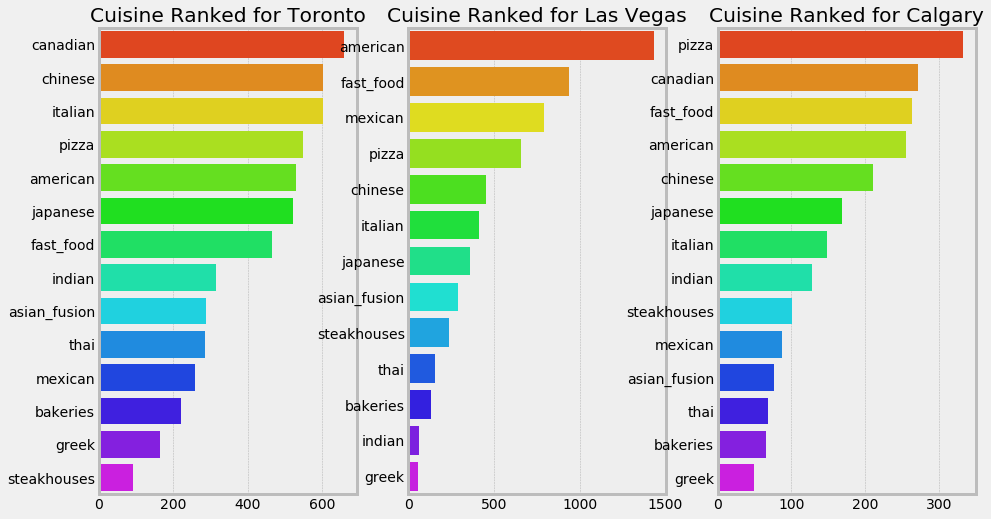

In [32]:
f,ax = plt.subplots(1,3, figsize=(14,8))
ax1,ax2,ax3  = ax.flatten()
cnt = t_restaurants['cuisine'].value_counts()[:20].to_frame()

sns.barplot(cnt['cuisine'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Cuisine Ranked for Toronto')


cnt = v_restaurants['cuisine'].value_counts()[:20].to_frame()

sns.barplot(cnt['cuisine'], cnt.index, palette = 'gist_rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Cuisine Ranked for Las Vegas')

cnt = c_restaurants['cuisine'].value_counts()[:20].to_frame()

sns.barplot(cnt['cuisine'], cnt.index, palette = 'gist_rainbow', ax =ax3)
ax3.set_xlabel('')
ax3.set_title('Cuisine Ranked for Calgary')

In [33]:
list(t_restaurants)

['address',
 'AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HairSpecializesIn',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi',
 'business_id',
 'categories',
 'city',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'neighborhood',
 'postal_code',
 'review_count',
 'stars',
 'state',
 'cuisine']

In [36]:
v_amer = v_restaurants[v_restaurants['cuisine'] == 'american']
v_italy = v_restaurants[v_restaurants['cuisine'] == 'italian']
v_chinese = v_restaurants[v_restaurants['cuisine'] == 'chinese']
t_amer = t_restaurants[t_restaurants['cuisine'] == 'american']
t_italy = t_restaurants[t_restaurants['cuisine'] == 'italian']
t_chinese = t_restaurants[t_restaurants['cuisine'] == 'chinese']
c_amer = c_restaurants[c_restaurants['cuisine'] == 'american']
c_italy = c_restaurants[c_restaurants['cuisine'] == 'italian'] 
c_chinese = c_restaurants[c_restaurants['cuisine'] == 'chinese']

odyssey_df = v_amer.append([v_italy,v_chinese,t_amer,t_italy,t_chinese,c_amer,c_italy,c_chinese])

In [37]:
odyssey_df.to_csv('odyssey_restaurants.csv')